# FullAdder no Qiskit

## 1° Parte: Iniciar e Configurar o backend e as credenciais

In [1]:
# Instalando os requisitos
# Não é necessário caso o env já tenha as bibliotecas
%pip install pylatexenc
%pip install qiskit
%pip install qiskit-ibmq-provider
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import qiskit
qiskit.__version__

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [3]:
# Importando as bibliotecas

from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt



ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [10]:
# Parametros da função 'QiskitRuntimeService'
# channel -> especifica qual canal de serviço está sendo utilizado, No caso, 'ibm_quantum' significa que você está se conectando ao IBM Quantum, o serviço de computação quântica em nuvem da IBM.
# token -> seu token de acesso 

token_str = 'ec220acfeee06d8e24e4d517e079fa222d241ea553eb3c34eb4630016a86190ea0bca5182aaae507c8ddf5042b3437ee5b8c3dc7b2feeb8cf0f4f662637ccf28'
service = QiskitRuntimeService(channel='ibm_quantum', # cloud ibm
                               token=token_str)

In [ ]:
# Salvando a conta localmente

IBMQ.save_account(token_str)

In [5]:
# Conectando ao backend

backend = service.backend(name= "ibm_brisbane")

### 1. Método Clássico:


![Half Adder](data/Half_Adder.png)

Nesse método, utiliza uma porta XOR para fazer a soma do Bit A e do Bit B e caso A = 1 e B = 1, a porta AND vai somar 1 no carry. Há diversas formas de trabalhar com o carry que vou mostrar depois

### 2. Método Quantico: 

#### 2.1. Configuração do Circuito: 
Para iniciar o circuito precisamos declarar 3 Qubits, 2 Qubits de entrada (A e B) e 1 Qubit para o Carry (vai-um) e alguns bits clássicos correspondentes para armazenar o resultado

#### 2.2. Definição dos dados de entrada
Vamos utilizar **portas X** ou *x-gates* para definir os estados de entrada de A e B, permitindo testar todas as combinações (00, 01, 10, 11). 
A **porta x** equivale a *NOT* quântica, ou seja, inverte o estado do qubit.

#### 2.3. Implementação da porta XOR para realizar a soma
Usaremos a **porta CNOT** para realizar a operação de A ⊕ B
* Controle no qubit A e alvo no qubit B.
* O resultado da soma será armazenado no qubit B.

#### 2.4. Implementação da porta AND para armazenar o Carry
Usaremos a **porta toffoli** que é o equivalente ao **AND** e irá armazenar no Qubit auxiliar



In [17]:
# Implementação do halfadder

qc = QuantumCircuit(3, 2) # declarando 3 qubits e 2 bits clássicos

qc.x(0) # Define A = 1
qc.x(1) # Define B = 1
# para usar outras combinações é so não aplicar a porta x

qc.ccx(0, 1, 2) # (controle1, controle2, alvo)
# Aplicando a porta toffoli e armazenando o resultado da operação no alvo ou qubit 2

qc.cx(0, 1) # (controle, alvo)
# Aplicando a porta CNOT (XOR) ao bit 0 e 1, no qual o qubit 1 vai armazenar a soma

qc.measure(1, 0)  # Soma (S)
qc.measure(2, 1)  # Carry (C)
# Medimos o qubit 1 (soma) e armazenamos o resultado no bit clássico 0.
# Medimos o qubit 2 (carry) e armazenamos o resultado no bit clássico 1.

### 3. Simulação dos métodos

Resultados da simulação:
{'10': 1024}


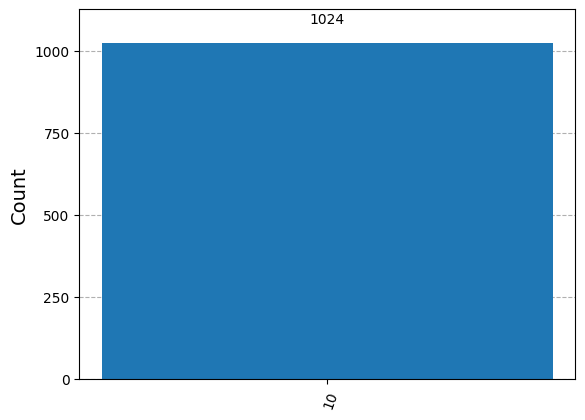

In [14]:
# Seleciona o simulador AerSimulator
simulador = AerSimulator()

# Transpila o Circuito para o backend escolhido (nesse caso o brisbane)
qc_transpilado = transpile(qc, simulador)

# Executa o circuito no simulador com 1024 execuções (shots)
job = simulador.run(qc_transpilado, shots=1024)

# Obtém os resultados
resultado = job.result()

# Obtém a contagem dos resultados
contagens = resultado.get_counts(qc_transpilado)

# Exibe os resultados
print("Resultados da simulação:")
print(contagens)

plot_histogram(contagens)


### 4. Execução do método

#### 4.1. Método Quântico

#### 4.1.1. Execução


In [5]:
qc_transpilado = transpile(qc, backend, optimization_level=1)# Transpilando para o backend em especifico
job = backend.run(qc_transpilado, shots=1024) # Executando no backend

NameError: name 'qc' is not defined

#### 4.1.2. Resultados

In [11]:
# Código generico para pegar qualquer resultado
# job_id e conectando com o trabalho em especifico
#preevious results
#print("Insert job id:")
job_id = 'cw68200xa9wg008wbpw0'
job = service.job(job_id) #previous job id (see previous job_id)
job.status()
result = job.result()

In [29]:
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Carrega a conta IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

# Substitua 'JOB_ID_AQUI' pelo ID real do seu job
job_id = 'JOB_ID_AQUI'
job = provider.backends.retrieve_job(job_id)

# Verifica o status do job
print(f"Status do job: {job.status()}")

# Obtém o resultado do job
resultado = job.result()

# Acessa as contagens dos resultados
contagens = resultado.get_counts()

# Exibe as contagens
print("Contagens:")
print(contagens)

# Visualiza os resultados com um histograma
plot_histogram(contagens)
plt.show()


TypeError: 'PubResult' object is not subscriptable

### 5. Visualização do método

#### 5.1. Método Quântico

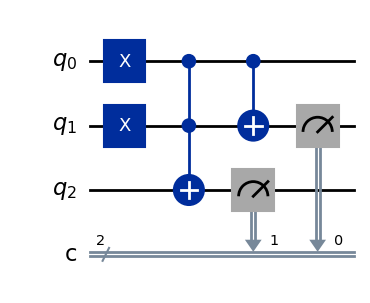

In [25]:
qc.draw(output='mpl')